1. What is Boosting in Machine Learning? Explain how it improves weak
learners.
- Boosting is an ensemble learning technique in machine learning that aims to convert weak learners into strong learners.

How Boosting Improves Weak Learners

Focuses on Mistakes: Each model tries to correct the errors of the previous ones.

Weighted Voting: Better-performing models get more say in the final prediction.

Bias Reduction: Boosting can significantly reduce bias, leading to better predictive accuracy.

2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
- AdaBoost (Adaptive Boosting) and Gradient Boosting are both boosting algorithms that improve model performance by combining multiple weak learners. However, they differ significantly in how they train these learners and correct errors.

AdaBoost works by assigning weights to each training sample. Initially, all samples have equal weight. After the first weak learner is trained, AdaBoost increases the weights of the samples that were misclassified. This forces the next learner to focus more on these difficult examples. As boosting continues, each model pays more attention to the mistakes of the previous ones. In the end, the predictions from all models are combined using a weighted vote, where more accurate models have more influence. The key idea is that AdaBoost adapts to the mistakes by changing sample weights during training.

Gradient Boosting, on the other hand, uses a completely different approach. Instead of adjusting sample weights, it builds each new model to predict the residual errors (the difference between actual and predicted values) of the previous model. The goal is to reduce a specific loss function, such as mean squared error or log-loss, by using gradient descent. Each learner is trained to correct the errors in the predictions of the ensemble so far, essentially following the "direction" in which the loss function decreases the most. Over time, the ensemble becomes better at minimizing the loss.

3.  How does regularization help in XGBoost?
- How Regularization Helps in XGBoost

XGBoost uses regularization to control the complexity of the model. It does this by penalizing overly complex trees during training. This helps in two ways:

Prevents Overfitting
Regularization discourages the model from making too many splits or creating overly deep trees that perfectly fit the training data (but fail on test data).

Improves Generalization
By keeping the model simpler, regularization helps it perform better on unseen data — making predictions more reliable.

4. Why is CatBoost considered efficient for handling categorical data?
- Why CatBoost Handles Categorical Data So Well

No Manual Preprocessing Needed
Most algorithms require you to convert categorical variables into numbers (using one-hot encoding or label encoding). This can be slow and inefficient, especially with high-cardinality features (like ZIP codes or product IDs).
 CatBoost does this automatically — you just tell it which features are categorical.

Uses "Ordered Target Statistics"
Instead of just assigning a number to each category, CatBoost looks at the relationship between the category and the target value.
For example, it might assign a value to "Color = Red" based on how often "Red" appears with the target label.
 It uses a clever trick called "ordered boosting" to avoid data leakage when calculating these statistics.

Efficient Encoding of High-Cardinality Features
When there are many unique values in a categorical column (like thousands of product IDs), most algorithms struggle or slow down.
 CatBoost handles these efficiently without blowing up memory or performance.

Better Accuracy Without Heavy Tuning
Since CatBoost treats categorical features natively, it often achieves better accuracy out of the box — with less feature engineering and tuning.

5. What are some real-world applications where boosting techniques are
preferred over bagging methods?
- Boosting is preferred over bagging when:

High accuracy is needed – e.g., in fraud detection or medical diagnosis.

Data is imbalanced – like in churn prediction or rare event detection.

Complex patterns exist – such as in CTR prediction or financial modeling.

Focus on hard examples – boosting improves by fixing previous errors.

Kaggle & ML competitions – boosting (XGBoost, LightGBM) often wins.



In [1]:
'''
6. Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
'''

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.96


In [2]:
'''
7. Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score
'''

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")


R-squared Score: 0.78


In [3]:
'''
8. Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
'''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Use GridSearchCV to find the best learning rate
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Learning Rate:", grid_search.best_params_['learning_rate'])
print(f"Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:27:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:27:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:27:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:27:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:27:30] WARNING: /w

Best Learning Rate: 0.2
Accuracy: 0.96


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:27:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [5]:
pip install catboost seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


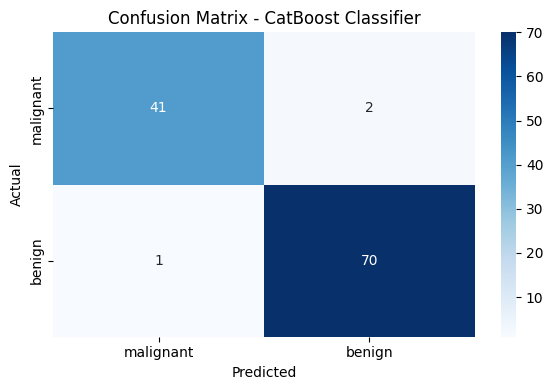

In [6]:
'''
9. Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
'''

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoost classifier (silent training)
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.tight_layout()
plt.show()


10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

- . Data Preprocessing
 a. Handle Missing Values

Numeric Features: Use median imputation (robust to outliers) or model-based imputation.

Categorical Features: Use mode imputation or introduce a new category like 'Missing'.

 If using CatBoost, it handles missing values internally — no need for manual imputation.

 b. Encode Categorical Features

AdaBoost / XGBoost: Use one-hot encoding or target encoding (carefully to avoid leakage).

CatBoost: Pass categorical column indices directly — it handles them natively and efficiently.

 c. Feature Scaling

Not required for boosting models, as decision trees are scale-invariant.

 d. Class Imbalance Handling

Since default prediction is often highly imbalanced:

Use stratified train/test split

Apply class weights, SMOTE, or adjust the scale_pos_weight (XGBoost) or class_weights (CatBoost)

 2. Choice of Boosting Algorithm
Model	Why Choose
CatBoost	Best choice here — handles categoricals, missing values, and imbalance natively. Less preprocessing.
XGBoost	Also strong, but needs more prep for categorical and missing data. Great if working with mostly numeric data.
AdaBoost	Simple but weaker with noisy or imbalanced data. Not ideal here.

 Recommendation: Start with CatBoost for this problem.

 3. Hyperparameter Tuning Strategy

Use GridSearchCV or RandomizedSearchCV (with stratified K-fold CV) to tune key hyperparameters:

For CatBoostClassifier:

iterations (number of trees)

learning_rate

depth

l2_leaf_reg (regularization)

class_weights (to handle imbalance)

Strategy:

Start with RandomizedSearchCV (faster)

Then fine-tune top parameters using GridSearchCV

Use early stopping with a validation set to avoid overfitting.

 4. Evaluation Metrics

Because the dataset is imbalanced, accuracy is misleading. Use:

Precision: How many predicted defaulters were actually defaulters?

Recall (Sensitivity): How many actual defaulters were correctly predicted?

F1-score: Balance between precision and recall.

ROC-AUC Score: Measures the model's ability to distinguish between classes.

Confusion Matrix: For visual insight into false positives/negatives.

 Focus on Recall or F1-score — especially if missing defaulters is costly for the business.

 5. Business Value of the Model

 Early Detection of Risk: Helps flag high-risk customers before default happens.

 Reduced Financial Losses: Enables better decision-making on loan approvals, limits, and interest rates.

 Targeted Interventions: Allows personalized outreach to at-risk customers (e.g., restructuring options).

 Better Portfolio Management: Helps maintain healthy loan books and improve profit margins.

 Compliance & Reporting: Supports regulatory requirements for risk modeling and explainability.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'learning_rate': 0.2, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 6, 'class_weights': {0: 1, 1: 2}}

Classification Report:
              precision    recall  f1-score   support

           0      0.960     0.994     0.977       169
           1      0.960     0.774     0.857        31

    accuracy                          0.960       200
   macro avg      0.960     0.884     0.917       200
weighted avg      0.960     0.960     0.958       200

ROC AUC Score: 0.951


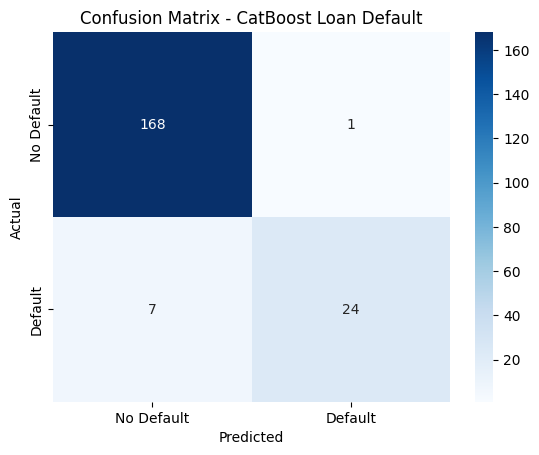

In [7]:
# Step 1: Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool

# Step 2: Simulate a Loan Default Dataset (Replace this with your real data)
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_informative=6, n_redundant=2,
                           n_classes=2, weights=[0.85, 0.15], flip_y=0.01, random_state=42)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df['target'] = y

# Add some categorical and missing values for realism
df['cat_feature'] = np.random.choice(['A', 'B', 'C', np.nan], size=len(df))
df.loc[df.sample(frac=0.1).index, 'feature_1'] = np.nan  # Add missing values

# Step 3: Preprocessing
# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Identify categorical features (CatBoost handles them natively)
categorical_features = ['cat_feature']

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: CatBoost Model with RandomizedSearchCV
cat_model = CatBoostClassifier(
    verbose=0,
    random_state=42,
    eval_metric='F1'
)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': [100, 200, 300],
    'class_weights': [{0: 1, 1: w} for w in [2, 5, 10]]  # handle imbalance
}

random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    scoring='f1',
    cv=3,
    n_iter=10,
    verbose=1,
    n_jobs=-1
)

# Fit the model (CatBoost handles missing and categorical values)
random_search.fit(X_train, y_train, cat_features=categorical_features)

# Step 6: Best Model Evaluation
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", random_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.3f}")

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Loan Default')
plt.show()

